<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab-sync-practice/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%84%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#전체

## 3장 회귀 알고리즘


회귀 : 두 변수 사이의 상관관계를 분석하는 방법


In [52]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

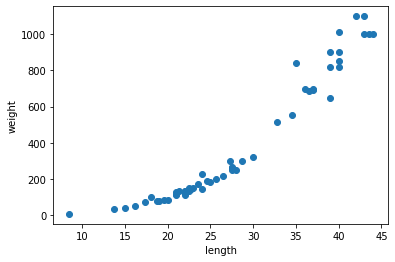

In [53]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

크기를 바꿀 수 있는 넘파이 배열 reshape() 메서드

변환 시 지정한 크기가 같아야 함


In [55]:
#(4,)->(2,2)
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array.shape)
test_array = test_array.reshape(-1,1)
print(test_array.shape)

(4,)
(2, 2)
(4, 1)


## reshape 연습

In [56]:
#(-1,n) : n만큼 열을 맞춰주고 나머지를 배열한다.
test_array1 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(test_array1.shape)
test_array1 = test_array1.reshape(-1,1)
print(test_array1.shape)
test_array1 = test_array1.reshape(-1,2)
print(test_array1.shape)
test_array1 = test_array1.reshape(-1,3)
print(test_array1.shape)
print(test_array1)

# (n,-1) : n만큼 행을 맞춰주고 나머지 배열
test_array1 = test_array1.reshape(1,-1)
print(test_array1.shape)

(3, 4)
(12, 1)
(6, 2)
(4, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(1, 12)


In [57]:
print(train_input.shape, test_input.shape)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


## $결정계수(R^2)$

k-NN(KNN, k-Nearest Neighbor, k-최근접 이웃)

**KNN-Regression(k-최근접 이웃 회귀) 알고리즘**




In [58]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이숫 회귀 모델 훈련
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.9928094061010639


위의 점수의 의미: 정답을 맞힌 개수의 비율

회귀에서는 이 값을 결정계수R^2라고 부른다

$R^2 = 1-\frac{(타깃-예측)^2의 합}{(타깃-평균)^2의 합}$


In [59]:
# mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)




19.157142857142862


예측이 평균적으로 19g정도 타깃값과 다르다는 것을 뜻한다.

## 과대적합 vs 과소적합

In [60]:
# 훈련 세트의 R^2점수
print(knr.score(train_input, train_target))


0.9698823289099255


훈련점수 > 테스트점수 = 훈련 세트에 
**과대적합**되었다

훈련점수 < 테스트점수 or 둘 다 낮음 = 훈련 세트에 
**과소적합**되었다

과소적합의 경우 해결법

이웃의 개수 k를 줄이는 것

의미 : 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것

기존에는 5개의 가까운 데이터를 평균내는데
이제는 3개의 가까운 데이터를 평균낸다

의문 : 더 적은 값을 참고하게 되는 것이 아닌가?

In [61]:
# 이웃의 개수 설정
knr.n_neighbors =3

#모델 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [62]:
print(knr.score(test_input, test_target))

0.974645996398761


## 선형 회귀

### 선형 회귀

기존 값과 동떨어진 아주 큰 값의 오류를 어떻게 해결할 것인가?

In [63]:
print(knr.predict([[50]]))

[1033.33333333]


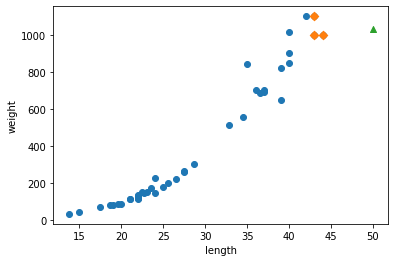

In [64]:
import matplotlib.pyplot as plt

distance, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터 
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

모델은 가장 가까운 값을 찾아서 평균내므로 가장 큰 값이나 가장 작은 값이 문제로 나올 경우 엉뚱한 값을 예측한다.

In [65]:
# 이웃 샘플의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


가장 높은 샘플 값을 가져오면 항상 이웃 샘플의 평균 값으로 값을 측정하는 오류

### 데이터들을 표현하는 직선을 찾기



In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델
lr.fit(train_input, train_target)

# 50cm 농어 예측
print(lr.predict([[50]]))

# 기울기coefficient(가중치) / 절편이 궁금하면
print(lr.coef_,lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


$농어 무게 = a*농어길이+b$

a = lr.coef_ \\
b = lr.intercept_


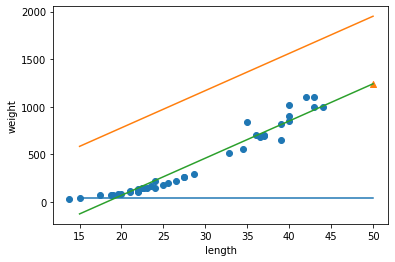

In [67]:
#선형 그래프
plt.scatter(train_input, train_target)

#1차 방정식 그래프 
plt.plot([15,50],[lr.coef_, lr.coef_])
plt.plot([15,50],[15*lr.coef_, 50*lr.coef_])
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 다항 회귀

다항 회귀 : 다항식을 사용한 선형 회귀

직선이 0이하가 될 수 있는 오류

그래프의 산점도를 확인하면 직선보다는 곡선이 더 알맞음 : 2차 방정식의 그래프가 필요하다

2차 방정식의 그래프를 그리기 위해서는 길이의 제곱 데이터가 필요하다

In [68]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_poly = np.column_stack((train_input ** 2, train_input)) \\
train_input에 있는 모든 항을 제곱하여 train_poly를 만든다.


train_input ** 

In [69]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [70]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


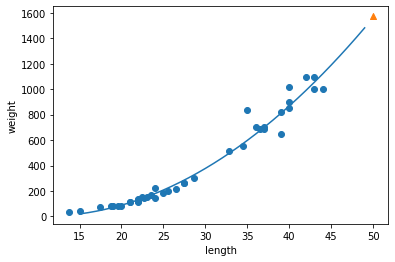

In [71]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [72]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


## 특성 공학과 규제

###다중 회귀

다중 회귀 : 여러 개의 특성을 사용한 선형 회귀  \\
특성 1개 : 선을 학습 \\
특성 2개 : 평면을 학습 \\

특성 공학 : 새로운 특성을 뽑아낸는 작업
농어 길이 X 농어 높이 = 새로운 특성을 뽑기

###판다스

판다스 : 데이터 분석 라이브러리

CSV파일(  ,로 나누어져 있는 텍스트 파일)을 함수에 주소를 넣어서 불러올 수 있음

In [73]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')

# to_numpy()로 넘파이 배열로 바꾸기
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [74]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [75]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기

변환기 : 특성을 만들거나 전처리하기 위한 클래스 제공

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))


[[1. 2. 3. 4. 6. 9.]]


PolynomialFeatures클래스는 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가합니다 \\
$1, 2, 3 , 2*2, 2*3, 3*3 $

선형 방정식의 절편은 항상 값이 1일 특성과 곱해지는 계수이다. \\
특성 (길이, 높이, 두깨, 1) \\
하지만 사이킷런은 자동으로 절편을 추가하므로 1을 사용할 필요가 없다(p155) \\

자동으로 절편을 추가한다는 것의 의미를 잘 모르겠음

poly = PolynomialFeatures(include_bias=False)
로 절편을 위한 항을 없앨 수 있다.

In [78]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
poly.get_feature_names()

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

###다중 회귀 모델 훈련

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


PolynomialFeatures 클래스의 degree매개변수를 사용하여 고차항의 최대 개수를 지정하기

degree=5 : 5제곱까지 특성을 만들어 출력

In [80]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


특성의 개수가 55개가 됨을 확인할 수 있다.

In [81]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


훈련 세트는 1과 가까운 거의 완벽한 점수임을 확인할 수 있다.
하지만 테스트 세트는 오히려 음수 값이 나온다
= 훈련 세트에 너무 많이 과대적합 한 것

## 규제

StandardScaler 클래스 : 특성을 표준점수를 변환하는 클래스

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

###릿지 회귀

sklearn.linear_model 패키지 \\
과대적합 해소

In [83]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386916


릿지와 라소를 사용할 시 규제의 양를 임의로 조절할 수 있다. \\

alpha 매개변수의 값이 크면 규제 강도가 강하다는 의미 -> 규제를 줄인다. \\
alpha 매개변수의 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합일 가능성이 크다 -> 규제를 늘린다.


$적절한 alpha값을 찾는 방법 : alpha값에 대한 R^2값의 그래프를 그려보기$

훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.


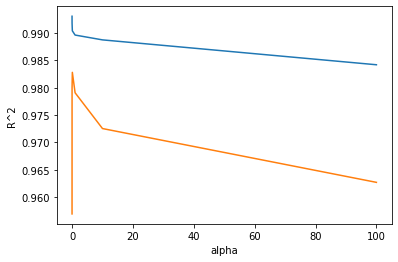

In [84]:
#그래프가 왼쪽으로 몰리므로 넘파이 로그 사용을 통해서 값을 지수로 표현
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

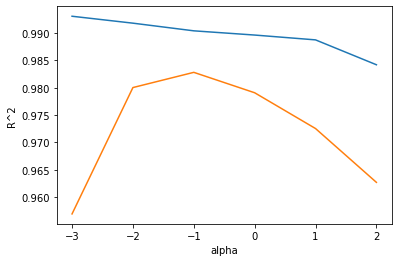

In [90]:
#score() 메서드의 결과를 저장할 리스트 생성
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #릿지 모델 만들기
  ridge = Ridge (alpha=alpha)
  #릿지 모델 훈련하기
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수 지정
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

#넘파이 상용로그 
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha값을 0.001부터 100까지 10배씩 늘려가며 릿지 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장

alpha값이 10^-1에서 가장 가까우므로 10^-1로 선정

In [88]:
ridge = Ridge(alpha= 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386916


### 라쏘 회귀

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


lasso = Lasso (alpha=alpha, max_iter=10000)

반복적인 계산을 통해서 최적의 계수를 찾아내는 모델이므로 충분히 큰 수 만큼 반복해주어야 한다.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


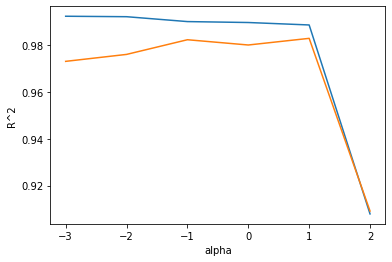

In [92]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #라쏘 모델 만들기
  lasso = Lasso (alpha=alpha, max_iter=10000)
  #라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  #훈련/ 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위의 것이 훈련 세트(파란색) \\
왼쪽으로 갈수록 과대적합
오른쪽으로 갈수록 과소적합

훈련점수 > 테스트점수 = 훈련 세트에 과대적합

훈련점수 < 테스트점수 or 둘 다 낮음 = 훈련 세트에 과소적합

lasso 규제에서 최적의 alpha값은 10^1으로 확인 가능

In [94]:
lasso = Lasso(alpha= 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9888067471131867
0.9824470598706695


라소 모델의 계수는 coef_ 속성에 저장되어 있음

In [95]:
print(np.sum(lasso.coef_==0))
#55개 특성 중 40개의 특성이 0이 됨을 확인 할 수 있음

40
